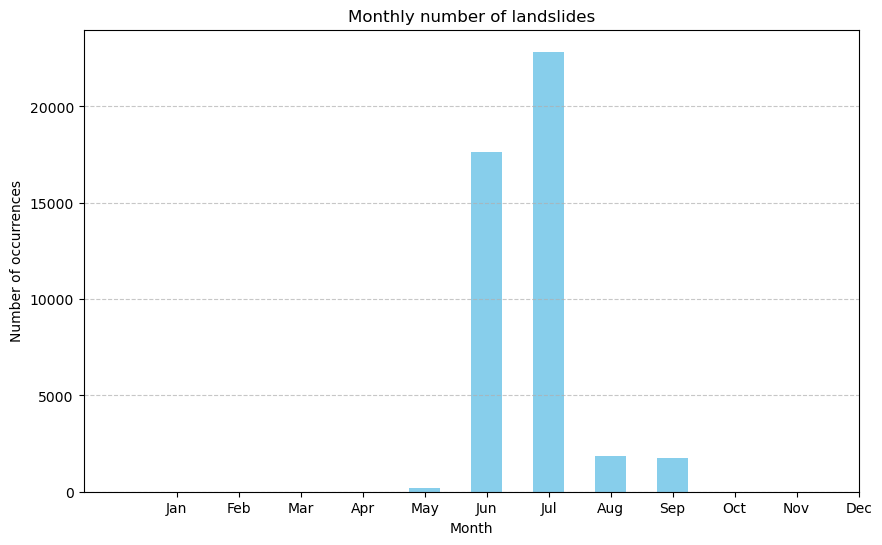

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 경로 설정
file_path = '/home/kng/kng/MOUNTAIN2/landslide_splited.csv'

# 엑셀 파일 읽기
data = pd.read_csv(file_path)

# '발생년월일' 열을 datetime 형식으로 변환하여 월 정보만 추출
data['Month'] = pd.to_datetime(data['date']).dt.month

# 월별 산사태 발생 건수 계산
monthly_counts = data['Month'].value_counts().sort_index()

# 발생하지 않은 월에 대한 발생 건수를 0으로 설정하여 보완
for month in range(1, 13):
    if month not in monthly_counts.index:
        monthly_counts[month] = 0

# 인덱스를 기준으로 정렬
monthly_counts = monthly_counts.sort_index()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly number of landslides')
plt.xlabel('Month')
plt.ylabel('Number of occurrences')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [21]:
import pandas as pd

# CSV 파일 경로 설정
file_path = '/home/kng/kng/MOUNTAIN2/기상청 ASOS 20240427.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path, encoding='cp949')

# '날짜' 열을 datetime 형식으로 변환하여 월 정보만 추출
data['Month'] = pd.to_datetime(data['일시']).dt.month

# 5월부터 9월까지의 데이터를 제외한 행 추출
filtered_data = data[(data['Month'] >= 5) & (data['Month'] <= 9)]

# 필요한 열만 선택 (예를 들어 '날짜', '온도', '습도' 등)
# selected_columns = data.columns
# filtered_data = filtered_data[selected_columns]

# 새로운 CSV 파일로 저장
filtered_data.to_parquet('ASOS_mayToSep.parquet', index=False)

In [ ]:
# CSV 파일 경로 설정
# file_path = '/home/kng/kng/MOUNTAIN2/기상청 ASOS 20240427.csv'

In [10]:
import pandas as pd


data = pd.read_parquet('/home/kng/kng/MOUNTAIN2/ASOS_mayToSep.parquet')
filtered_data = data

In [1]:


# CSV 파일 읽기
data = pd.read_csv(file_path, encoding='cp949')

filtered_data = data

In [11]:
print(filtered_data.columns.tolist())

['지점', '지점명', 'date', 'avg_temp', 'lowest_temp', 'highest_temp', 'rainfalling_hr_asos', '1hr_rainfall_mm_asos', 'daily_rainfall_asos', 'max_windspeed_asos', 'avg_windspeed_asos', 'avg_dewpoint_temp', 'min_rhum_per', 'avg_rhum_per', 'avg_vapor_hpa', 'avg_local_press_hpa', 'max_sea_press_hpa', 'min_sea_press_hpa', 'avg_sea_press_hpa', 'avg_cloud', '지점코드', 'sd', 'sgg', 'umd', 'ri', 'sgg_cd', 'umd_cd']


In [3]:
filtered_data = filtered_data.rename(columns={'일시':'date', '평균기온(°C)':'avg_temp', '최저기온(°C)':'lowest_temp', '최고기온(°C)':'highest_temp', '강수 계속시간(hr)':'rainfalling_hr_asos', '1시간 최다강수량(mm)':'1hr_rainfall_mm_asos', '일강수량(mm)':'daily_rainfall_asos', '최대 풍속(m/s)':'max_windspeed_asos', '평균 풍속(m/s)':'avg_windspeed_asos', '평균 이슬점온도(°C)':'avg_dewpoint_temp', '최소 상대습도(%)':'min_rhum_per', '평균 상대습도(%)':'avg_rhum_per', '평균 증기압(hPa)':'avg_vapor_hpa', '평균 현지기압(hPa)':'avg_local_press_hpa', '최고 해면기압(hPa)':'max_sea_press_hpa', '최저 해면기압(hPa)':'min_sea_press_hpa', '평균 해면기압(hPa)':'avg_sea_press_hpa', '평균 전운량(1/10)':'avg_cloud'})

filtered_data = filtered_data.drop(columns=['10분 최다 강수량(mm)', '평균 중하층운량(1/10)','합계 대형증발량(mm)','합계 소형증발량(mm)','최대 순간 풍속(m/s)','Month'])

KeyError: "['Month'] not found in axis"

In [6]:
filtered_data = filtered_data.drop(columns=['10분 최다 강수량(mm)', '평균 중하층운량(1/10)','합계 대형증발량(mm)','합계 소형증발량(mm)','최대 순간 풍속(m/s)',])

In [12]:
print(filtered_data.columns.tolist())
filtered_data

['지점', '지점명', 'date', 'avg_temp', 'lowest_temp', 'highest_temp', 'rainfalling_hr_asos', '1hr_rainfall_mm_asos', 'daily_rainfall_asos', 'max_windspeed_asos', 'avg_windspeed_asos', 'avg_dewpoint_temp', 'min_rhum_per', 'avg_rhum_per', 'avg_vapor_hpa', 'avg_local_press_hpa', 'max_sea_press_hpa', 'min_sea_press_hpa', 'avg_sea_press_hpa', 'avg_cloud', '지점코드', 'sd', 'sgg', 'umd', 'ri', 'sgg_cd', 'umd_cd']


,지점,지점명,date,avg_temp,lowest_temp,highest_temp,rainfalling_hr_asos,1hr_rainfall_mm_asos,daily_rainfall_asos,max_windspeed_asos,...,min_sea_press_hpa,avg_sea_press_hpa,avg_cloud,지점코드,sd,sgg,umd,ri,sgg_cd,umd_cd
0,90,속초,2019-05-01,15.5,10.1,21.2,0.0,0.0,0.0,3.9,...,1002.0,1004.8,2.6,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
1,90,속초,2019-05-02,18.4,10.4,26.9,0.0,0.0,0.0,5.5,...,1005.9,1009.0,0.0,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
2,90,속초,2019-05-03,15.3,10.9,19.1,0.0,0.0,0.0,5.6,...,1012.9,1016.1,0.8,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
3,90,속초,2019-05-04,15.3,11.1,19.6,0.0,0.0,0.0,5.4,...,1015.3,1017.0,3.5,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
4,90,속초,2019-05-05,20.1,11.7,30.0,0.0,0.0,0.0,6.2,...,1009.0,1013.2,7.3,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73039,296,북부산,2023-09-26,22.8,21.6,25.0,0.0,0.5,0.5,2.5,...,1012.6,1013.8,7.9,296.0,부산광역시,강서구,대저1동,None,26440.0,26440101.0
73040,296,북부산,2023-09-27,24.8,21.0,28.5,0.0,0.0,0.0,2.8,...,1009.9,1011.8,7.8,296.0,부산광역시,강서구,대저1동,None,26440.0,26440101.0
73041,296,북부산,2023-09-28,24.2,19.2,30.0,0.0,0.0,0.0,4.1,...,1011.8,1013.4,3.1,296.0,부산광역시,강서구,대저1동,None,26440.0,26440101.0
73042,296,북부산,2023-09-29,22.5,16.6,29.7,0.0,0.0,0.0,4.4,...,1012.4,1014.3,4.1,296.0,부산광역시,강서구,대저1동,None,26440.0,26440101.0


In [33]:
filtered_data = filtered_data.fillna(0)
filtered_data.to_parquet('ASOS_mayToSep.parquet', index=False)


In [35]:
addrcode = pd.read_csv('/home/kng/kng/쓰레기통/MOUNTAIN/station_with_code.csv')
addrcode

,지점코드,지점명,sd,sgg,umd,ri,sgg_cd,umd_cd
0,90,속초,강원특별자치도,고성군,토성면,봉포리,42820,42820330
1,92,양양(공),강원특별자치도,양양군,손양면,동호리,42830,42830320
2,93,북춘천,강원특별자치도,춘천시,신북읍,산천리,42110,42110250
3,95,철원,강원특별자치도,철원군,갈말읍,군탄리,42780,42780256
4,96,독도,경상북도,울릉군,울릉읍,독도리,47940,47940250
...,...,...,...,...,...,...,...,...
111,288,밀양,경상남도,밀양시,내이동,NaN,48270,48270102
112,289,산청,경상남도,산청군,산청읍,지리,48860,48860250
113,294,거제,경상남도,거제시,장평동,NaN,48310,48310108
114,295,남해,경상남도,남해군,이동면,다정리,48840,48840310


In [39]:
merged = pd.merge(filtered_data, addrcode, on='지점명', how='left')
merged

,지점,지점명,date,avg_temp,lowest_temp,highest_temp,rainfalling_hr_asos,1hr_rainfall_mm_asos,daily_rainfall_asos,max_windspeed_asos,...,min_sea_press_hpa,avg_sea_press_hpa,avg_cloud,지점코드,sd,sgg,umd,ri,sgg_cd,umd_cd
0,90,속초,2019-05-01,15.5,10.1,21.2,0.0,0.0,0.0,3.9,...,1002.0,1004.8,2.6,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
1,90,속초,2019-05-02,18.4,10.4,26.9,0.0,0.0,0.0,5.5,...,1005.9,1009.0,0.0,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
2,90,속초,2019-05-03,15.3,10.9,19.1,0.0,0.0,0.0,5.6,...,1012.9,1016.1,0.8,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
3,90,속초,2019-05-04,15.3,11.1,19.6,0.0,0.0,0.0,5.4,...,1015.3,1017.0,3.5,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
4,90,속초,2019-05-05,20.1,11.7,30.0,0.0,0.0,0.0,6.2,...,1009.0,1013.2,7.3,90.0,강원특별자치도,고성군,토성면,봉포리,42820.0,42820330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73039,296,북부산,2023-09-26,22.8,21.6,25.0,0.0,0.5,0.5,2.5,...,1012.6,1013.8,7.9,296.0,부산광역시,강서구,대저1동,NaN,26440.0,26440101.0
73040,296,북부산,2023-09-27,24.8,21.0,28.5,0.0,0.0,0.0,2.8,...,1009.9,1011.8,7.8,296.0,부산광역시,강서구,대저1동,NaN,26440.0,26440101.0
73041,296,북부산,2023-09-28,24.2,19.2,30.0,0.0,0.0,0.0,4.1,...,1011.8,1013.4,3.1,296.0,부산광역시,강서구,대저1동,NaN,26440.0,26440101.0
73042,296,북부산,2023-09-29,22.5,16.6,29.7,0.0,0.0,0.0,4.4,...,1012.4,1014.3,4.1,296.0,부산광역시,강서구,대저1동,NaN,26440.0,26440101.0


In [40]:
merged.to_parquet('ASOS_mayToSep.parquet', index=False)

In [47]:
soil = pd.read_csv('/home/kng/kng/쓰레기통/MOUNTAIN/SoilMap/soilmap_all2.csv')
soil

/tmp/ipykernel_14986/3543215996.py:1: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  soil = pd.read_csv('/home/kng/kng/쓰레기통/MOUNTAIN/SoilMap/soilmap_all2.csv')


,CTPRV_CD,sgg_cd,EMNDN_CD,CMBLC_ID,SBLT_ID,SMAR_NO,SLTP_CD,STQLT_CD,MPDMR_NO,STNDA_NMPL,...,KRPN_STIND,GNGN_LCLT,CNDST_PINE,ACTSM_STIN,JBLPN_STIN,MAP_NAM,MAP_NUM,SD_NM,SD_CD,Unnamed: 0
0,26.0,26440.0,26440122,0.0,0.0,130.0,5.0,NaN,348041.0,강서구,...,11,0,5,12,8,동선,358163,부산광역시,26,NaN
1,26.0,26440.0,26440122,0.0,0.0,131.0,6.0,NaN,358163.0,강서구,...,13,0,9,17,11,동선,358163,부산광역시,26,NaN
2,26.0,26440.0,26440122,0.0,0.0,127.0,6.0,NaN,348041.0,강서구,...,13,0,8,15,11,동선,358163,부산광역시,26,NaN
3,26.0,26440.0,26440122,0.0,0.0,132.0,6.0,NaN,358163.0,강서구,...,13,0,9,16,12,동선,358163,부산광역시,26,NaN
4,26.0,26440.0,26440122,0.0,0.0,125.0,6.0,NaN,358163.0,강서구,...,13,0,8,15,11,동선,358163,부산광역시,26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347608,47.0,47820.0,47820350,0,0.0,167,82.0,NaN,359053.0,운문면,...,0,0,0,0,0,상북,359053,경상북도,47,4670.0
347609,47.0,47820.0,47820350,0,0.0,167,82.0,NaN,359053.0,운문면,...,0,0,0,0,0,상북,359053,경상남도,48,4671.0
347610,48.0,48270.0,48270340,0,0.0,96,2.0,NaN,359053.0,산내,...,11,10,10,16,12,상북,359053,울산광역시,31,4672.0
347611,48.0,48270.0,48270340,0,0.0,96,2.0,NaN,359053.0,산내,...,11,10,10,16,12,상북,359053,경상북도,47,4673.0


In [50]:
soil = soil.dropna()
soil = soil.drop(columns=['Unnamed: 0'], axis=1)


KeyError: "['Unnamed: 0'] not found in axis"

In [63]:
asos_soil_merged = pd.merge(merged, soil, on='sgg_cd', how='left')
asos_soil_merged

,지점,지점명,date,avg_temp,lowest_temp,highest_temp,rainfalling_hr_asos,1hr_rainfall_mm_asos,daily_rainfall_asos,max_windspeed_asos,...,LARCH_STIN,KRPN_STIND,GNGN_LCLT,CNDST_PINE,ACTSM_STIN,JBLPN_STIN,MAP_NAM,MAP_NUM,SD_NM,SD_CD
0,90,속초,2019-05-01,15.5,10.1,21.2,0.0,0.0,0.0,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2019-05-02,18.4,10.4,26.9,0.0,0.0,0.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2019-05-03,15.3,10.9,19.1,0.0,0.0,0.0,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2019-05-04,15.3,11.1,19.6,0.0,0.0,0.0,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2019-05-05,20.1,11.7,30.0,0.0,0.0,0.0,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186771,296,북부산,2023-09-26,22.8,21.6,25.0,0.0,0.5,0.5,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186772,296,북부산,2023-09-27,24.8,21.0,28.5,0.0,0.0,0.0,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186773,296,북부산,2023-09-28,24.2,19.2,30.0,0.0,0.0,0.0,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186774,296,북부산,2023-09-29,22.5,16.6,29.7,0.0,0.0,0.0,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
asos_soil_merged = asos_soil_merged.dropna()
asos_soil_merged

,지점,지점명,date,avg_temp,lowest_temp,highest_temp,rainfalling_hr_asos,1hr_rainfall_mm_asos,daily_rainfall_asos,max_windspeed_asos,...,LARCH_STIN,KRPN_STIND,GNGN_LCLT,CNDST_PINE,ACTSM_STIN,JBLPN_STIN,MAP_NAM,MAP_NUM,SD_NM,SD_CD
14535,130,울진,2019-05-01,14.7,12.4,17.6,0.0,0.0,0.0,3.5,...,14.0,14.0,12.0,0.0,17.0,11.0,발리,369014.0,경상북도,47.0
14536,130,울진,2019-05-01,14.7,12.4,17.6,0.0,0.0,0.0,3.5,...,13.0,14.0,9.0,9.0,16.0,11.0,쌍전,369012.0,경상북도,47.0
14537,130,울진,2019-05-01,14.7,12.4,17.6,0.0,0.0,0.0,3.5,...,12.0,12.0,7.0,7.0,14.0,9.0,쌍전,369012.0,경상북도,47.0
14538,130,울진,2019-05-01,14.7,12.4,17.6,0.0,0.0,0.0,3.5,...,13.0,15.0,10.0,9.0,17.0,12.0,쌍전,369012.0,경상북도,47.0
14539,130,울진,2019-05-01,14.7,12.4,17.6,0.0,0.0,0.0,3.5,...,13.0,14.0,10.0,10.0,17.0,12.0,쌍전,369012.0,경상북도,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185088,289,산청,2023-09-30,19.2,15.1,24.8,0.0,3.6,5.7,3.7,...,11.0,10.0,0.0,9.0,15.0,10.0,청암,357161.0,경상남도,48.0
1185089,289,산청,2023-09-30,19.2,15.1,24.8,0.0,3.6,5.7,3.7,...,12.0,11.0,0.0,10.0,16.0,11.0,사리,357123.0,경상남도,48.0
1185090,289,산청,2023-09-30,19.2,15.1,24.8,0.0,3.6,5.7,3.7,...,11.0,11.0,0.0,9.0,16.0,0.0,사리,357123.0,경상남도,48.0
1185091,289,산청,2023-09-30,19.2,15.1,24.8,0.0,3.6,5.7,3.7,...,11.0,12.0,0.0,11.0,16.0,0.0,사리,357123.0,경상남도,48.0


In [69]:
asos_soil_merged.to_csv('asos_soil_merged.csv', index=False)

In [72]:
asos_soil_merged = asos_soil_merged[['지점', '지점명', 'date', 'sd', 'sgg', 'umd', 'ri', 'sgg_cd', 'umd_cd', 'avg_temp', 'lowest_temp', 'highest_temp', 'rainfalling_hr_asos', '1hr_rainfall_mm_asos', 'daily_rainfall_asos', 'max_windspeed_asos', 'avg_windspeed_asos', 'avg_dewpoint_temp', 'min_rhum_per', 'avg_rhum_per', 'avg_vapor_hpa', 'avg_local_press_hpa', 'max_sea_press_hpa', 'min_sea_press_hpa', 'avg_sea_press_hpa', 'avg_cloud', '지점코드', 'CTPRV_CD', 'EMNDN_CD', 'CMBLC_ID', 'SBLT_ID', 'SMAR_NO', 'SLTP_CD', 'STQLT_CD', 'MPDMR_NO', 'STNDA_NMPL', 'MPDMR_NM', 'EXMNN_AREA', 'RHGLT_GGRP', 'WTHR_CD', 'TPGRP_TPCD', 'CLZN_CD', 'PRRCK_LARG', 'SOIL_DRNGE', 'LOCTN_GRDN', 'ALTTD_CD', 'ACCMA_FOR', 'WASH_CD', 'SLANT_TYP', 'EIGHT_CD', 'ROCK_EXDGR', 'RIDGE_VS', 'WIND_EXDGR', 'WTEFF_DGR', 'VLDTY_SLDP', 'SIAFLR_STP', 'SIBFLR_STP', 'SIAFLR_SLD', 'SIBFLR_SLD', 'SIAFLR_ERC', 'SIBFLR_ERC', 'SIAFLR_ORM', 'SIBFLR_ORM', 'SIAFLR_SCS', 'SIBFLR_SCS', 'SIAFLR_CBS', 'SIBFLR_CBS', 'SIAFLR_STR', 'SIBFLR_STR', 'SIAFLR_HGD', 'SIBFLR_HGD', 'SIAFLR_CNS', 'SIBFLR_CNS', 'SIAFLR_HYP', 'SIAFLR_HER', 'SIBFLR_HER', 'SIAFLR_SMA', 'SIBFLR_SMA', 'SIAFLR_MDD', 'SIBFLR_MDD', 'SIAFLR_LAR', 'SIBFLR_LAR', 'KOFTR_CD', 'TREEHT1', 'TREEHT2', 'TREEHT3', 'TREEHT4', 'TREEHT5', 'FRAG1', 'FRAG2', 'FRAG3', 'FRAG4', 'FRAG5', 'REAL_STIND', 'INTGR_TYP', 'STQGD_VAL', 'TRHGH_SUM', 'TRHGH_AVRG', 'TOT_FRAG', 'AVRG_FRAG', 'LARCH_STIN', 'KRPN_STIND', 'GNGN_LCLT', 'CNDST_PINE', 'ACTSM_STIN', 'JBLPN_STIN', 'MAP_NAM', 'MAP_NUM', 'SD_NM', 'SD_CD']]

In [75]:
asos_soil_merged


,지점,지점명,date,sd,sgg,umd,ri,sgg_cd,umd_cd,avg_temp,...,LARCH_STIN,KRPN_STIND,GNGN_LCLT,CNDST_PINE,ACTSM_STIN,JBLPN_STIN,MAP_NAM,MAP_NUM,SD_NM,SD_CD
14535,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,14.0,14.0,12.0,0.0,17.0,11.0,발리,369014.0,경상북도,47.0
14536,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,13.0,14.0,9.0,9.0,16.0,11.0,쌍전,369012.0,경상북도,47.0
14537,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,12.0,12.0,7.0,7.0,14.0,9.0,쌍전,369012.0,경상북도,47.0
14538,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,13.0,15.0,10.0,9.0,17.0,12.0,쌍전,369012.0,경상북도,47.0
14539,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,13.0,14.0,10.0,10.0,17.0,12.0,쌍전,369012.0,경상북도,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185088,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,11.0,10.0,0.0,9.0,15.0,10.0,청암,357161.0,경상남도,48.0
1185089,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,12.0,11.0,0.0,10.0,16.0,11.0,사리,357123.0,경상남도,48.0
1185090,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,11.0,11.0,0.0,9.0,16.0,0.0,사리,357123.0,경상남도,48.0
1185091,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,11.0,12.0,0.0,11.0,16.0,0.0,사리,357123.0,경상남도,48.0


In [77]:
land = pd.read_csv('/home/kng/kng/쓰레기통/MOUNTAIN/LAST_LANDSLIDE_5yrs.csv')


land_asoil_merged = pd.merge(asos_soil_merged, land, on=['umd_cd','date'],how='left')
land_asoil_merged

,지점,지점명,date,sd,sgg,umd,ri,sgg_cd_x,umd_cd,avg_temp,...,CNDST_PINE,ACTSM_STIN,JBLPN_STIN,MAP_NAM,MAP_NUM,SD_NM,SD_CD,sgg_cd_y,damage_ha,is_landslided
0,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,0.0,17.0,11.0,발리,369014.0,경상북도,47.0,NaN,NaN,NaN
1,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,9.0,16.0,11.0,쌍전,369012.0,경상북도,47.0,NaN,NaN,NaN
2,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,7.0,14.0,9.0,쌍전,369012.0,경상북도,47.0,NaN,NaN,NaN
3,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,9.0,17.0,12.0,쌍전,369012.0,경상북도,47.0,NaN,NaN,NaN
4,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,10.0,17.0,12.0,쌍전,369012.0,경상북도,47.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600750,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,9.0,15.0,10.0,청암,357161.0,경상남도,48.0,NaN,NaN,NaN
600751,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,10.0,16.0,11.0,사리,357123.0,경상남도,48.0,NaN,NaN,NaN
600752,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,9.0,16.0,0.0,사리,357123.0,경상남도,48.0,NaN,NaN,NaN
600753,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,11.0,16.0,0.0,사리,357123.0,경상남도,48.0,NaN,NaN,NaN


In [80]:
print(land_asoil_merged.columns.tolist())
land_asoil_merged = land_asoil_merged.drop(columns=['damage_ha', 'sgg_cd_y'])
land_asoil_merged

['지점', '지점명', 'date', 'sd', 'sgg', 'umd', 'ri', 'sgg_cd_x', 'umd_cd', 'avg_temp', 'lowest_temp', 'highest_temp', 'rainfalling_hr_asos', '1hr_rainfall_mm_asos', 'daily_rainfall_asos', 'max_windspeed_asos', 'avg_windspeed_asos', 'avg_dewpoint_temp', 'min_rhum_per', 'avg_rhum_per', 'avg_vapor_hpa', 'avg_local_press_hpa', 'max_sea_press_hpa', 'min_sea_press_hpa', 'avg_sea_press_hpa', 'avg_cloud', '지점코드', 'CTPRV_CD', 'EMNDN_CD', 'CMBLC_ID', 'SBLT_ID', 'SMAR_NO', 'SLTP_CD', 'STQLT_CD', 'MPDMR_NO', 'STNDA_NMPL', 'MPDMR_NM', 'EXMNN_AREA', 'RHGLT_GGRP', 'WTHR_CD', 'TPGRP_TPCD', 'CLZN_CD', 'PRRCK_LARG', 'SOIL_DRNGE', 'LOCTN_GRDN', 'ALTTD_CD', 'ACCMA_FOR', 'WASH_CD', 'SLANT_TYP', 'EIGHT_CD', 'ROCK_EXDGR', 'RIDGE_VS', 'WIND_EXDGR', 'WTEFF_DGR', 'VLDTY_SLDP', 'SIAFLR_STP', 'SIBFLR_STP', 'SIAFLR_SLD', 'SIBFLR_SLD', 'SIAFLR_ERC', 'SIBFLR_ERC', 'SIAFLR_ORM', 'SIBFLR_ORM', 'SIAFLR_SCS', 'SIBFLR_SCS', 'SIAFLR_CBS', 'SIBFLR_CBS', 'SIAFLR_STR', 'SIBFLR_STR', 'SIAFLR_HGD', 'SIBFLR_HGD', 'SIAFLR_CNS', 'SIBF

,지점,지점명,date,sd,sgg,umd,ri,sgg_cd_x,umd_cd,avg_temp,...,KRPN_STIND,GNGN_LCLT,CNDST_PINE,ACTSM_STIN,JBLPN_STIN,MAP_NAM,MAP_NUM,SD_NM,SD_CD,is_landslided
0,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,14.0,12.0,0.0,17.0,11.0,발리,369014.0,경상북도,47.0,NaN
1,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,14.0,9.0,9.0,16.0,11.0,쌍전,369012.0,경상북도,47.0,NaN
2,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,12.0,7.0,7.0,14.0,9.0,쌍전,369012.0,경상북도,47.0,NaN
3,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,15.0,10.0,9.0,17.0,12.0,쌍전,369012.0,경상북도,47.0,NaN
4,130,울진,2019-05-01,경상북도,울진군,울진읍,연지리,47930.0,47930250.0,14.7,...,14.0,10.0,10.0,17.0,12.0,쌍전,369012.0,경상북도,47.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600750,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,10.0,0.0,9.0,15.0,10.0,청암,357161.0,경상남도,48.0,NaN
600751,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,11.0,0.0,10.0,16.0,11.0,사리,357123.0,경상남도,48.0,NaN
600752,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,11.0,0.0,9.0,16.0,0.0,사리,357123.0,경상남도,48.0,NaN
600753,289,산청,2023-09-30,경상남도,산청군,산청읍,지리,48860.0,48860250.0,19.2,...,12.0,0.0,11.0,16.0,0.0,사리,357123.0,경상남도,48.0,NaN


In [86]:
land_asoil_merged['is_landslided'] = land_asoil_merged['is_landslided'].fillna(0)
print(land_asoil_merged.columns.tolist())
land_asoil_merged = land_asoil_merged.drop(columns=['지점', '지점명', 'date', 'sd', 'sgg', 'umd', 'ri', 'sgg_cd_x', 'umd_cd','지점코드', 'CTPRV_CD', 'EMNDN_CD','MPDMR_NO','MPDMR_NO', 'STNDA_NMPL', 'MPDMR_NM', 'EXMNN_AREA','MAP_NAM', 'MAP_NUM', 'SD_NM', 'SD_CD'], axis=1)

['지점', '지점명', 'date', 'sd', 'sgg', 'umd', 'ri', 'sgg_cd_x', 'umd_cd', 'avg_temp', 'lowest_temp', 'highest_temp', 'rainfalling_hr_asos', '1hr_rainfall_mm_asos', 'daily_rainfall_asos', 'max_windspeed_asos', 'avg_windspeed_asos', 'avg_dewpoint_temp', 'min_rhum_per', 'avg_rhum_per', 'avg_vapor_hpa', 'avg_local_press_hpa', 'max_sea_press_hpa', 'min_sea_press_hpa', 'avg_sea_press_hpa', 'avg_cloud', '지점코드', 'CTPRV_CD', 'EMNDN_CD', 'CMBLC_ID', 'SBLT_ID', 'SMAR_NO', 'SLTP_CD', 'STQLT_CD', 'MPDMR_NO', 'STNDA_NMPL', 'MPDMR_NM', 'EXMNN_AREA', 'RHGLT_GGRP', 'WTHR_CD', 'TPGRP_TPCD', 'CLZN_CD', 'PRRCK_LARG', 'SOIL_DRNGE', 'LOCTN_GRDN', 'ALTTD_CD', 'ACCMA_FOR', 'WASH_CD', 'SLANT_TYP', 'EIGHT_CD', 'ROCK_EXDGR', 'RIDGE_VS', 'WIND_EXDGR', 'WTEFF_DGR', 'VLDTY_SLDP', 'SIAFLR_STP', 'SIBFLR_STP', 'SIAFLR_SLD', 'SIBFLR_SLD', 'SIAFLR_ERC', 'SIBFLR_ERC', 'SIAFLR_ORM', 'SIBFLR_ORM', 'SIAFLR_SCS', 'SIBFLR_SCS', 'SIAFLR_CBS', 'SIBFLR_CBS', 'SIAFLR_STR', 'SIBFLR_STR', 'SIAFLR_HGD', 'SIBFLR_HGD', 'SIAFLR_CNS', 'SIBF

In [92]:
print(land_asoil_merged.columns.tolist())
land_asoil_merged.to_csv('LAND_ASOS_SOIL_MERGED.csv',index=False)

['avg_temp', 'lowest_temp', 'highest_temp', 'rainfalling_hr_asos', '1hr_rainfall_mm_asos', 'daily_rainfall_asos', 'max_windspeed_asos', 'avg_windspeed_asos', 'avg_dewpoint_temp', 'min_rhum_per', 'avg_rhum_per', 'avg_vapor_hpa', 'avg_local_press_hpa', 'max_sea_press_hpa', 'min_sea_press_hpa', 'avg_sea_press_hpa', 'avg_cloud', 'CMBLC_ID', 'SBLT_ID', 'SMAR_NO', 'SLTP_CD', 'STQLT_CD', 'RHGLT_GGRP', 'WTHR_CD', 'TPGRP_TPCD', 'CLZN_CD', 'PRRCK_LARG', 'SOIL_DRNGE', 'LOCTN_GRDN', 'ALTTD_CD', 'ACCMA_FOR', 'WASH_CD', 'SLANT_TYP', 'EIGHT_CD', 'ROCK_EXDGR', 'RIDGE_VS', 'WIND_EXDGR', 'WTEFF_DGR', 'VLDTY_SLDP', 'SIAFLR_STP', 'SIBFLR_STP', 'SIAFLR_SLD', 'SIBFLR_SLD', 'SIAFLR_ERC', 'SIBFLR_ERC', 'SIAFLR_ORM', 'SIBFLR_ORM', 'SIAFLR_SCS', 'SIBFLR_SCS', 'SIAFLR_CBS', 'SIBFLR_CBS', 'SIAFLR_STR', 'SIBFLR_STR', 'SIAFLR_HGD', 'SIBFLR_HGD', 'SIAFLR_CNS', 'SIBFLR_CNS', 'SIAFLR_HYP', 'SIAFLR_HER', 'SIBFLR_HER', 'SIAFLR_SMA', 'SIBFLR_SMA', 'SIAFLR_MDD', 'SIBFLR_MDD', 'SIAFLR_LAR', 'SIBFLR_LAR', 'KOFTR_CD', 'TREEH